Importando as bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Importando os dados

In [ ]:
fipecars = pd.read_csv('/content/drive/MyDrive/Colab/fipe_cars.csv')

Adicionar coluna "age_years" na tabela "fipecars"

In [ ]:
fipecars["age_years"] = fipecars["year_of_reference"] - fipecars['year_model']

Removendo coluna sem uso

In [ ]:
fipe = fipecars.drop(columns=['authentication'])
fipe = fipe.dropna()

Transformando as datas em string

In [ ]:
fipe[['year_model']] = fipe[['year_model']].astype(str)
fipe[['engine_size']] = fipe[['engine_size']].astype(str)



Adicionando uma coluna com o nome completo

In [ ]:
fipe['full_name'] = fipe['model'] + ' / ' + fipe['engine_size'] + ' / ' + fipe['year_model'] + ' / ' + fipe['fuel'] + ' / ' + fipe['gear'] + ' / ' + fipe['fipe_code']


Fazendo a média do ano de cada modelo de carro

In [ ]:
fipe['year_mean'] = fipe.groupby(['full_name', 'year_of_reference'])['avg_price_brl'].transform('mean').round(2)

Fazer a variação percentual do valor do carro com relação ao ano anterior

In [ ]:
fipe = fipe.sort_values(by=['full_name', 'year_of_reference'])
fipe['pct_var'] = fipe.groupby('full_name')['year_mean'].pct_change()*100

In [ ]:
fipe.to_excel('/content/drive/MyDrive/Colab/fipeBase.xlsx')

In [ ]:
fipe = pd.read_excel('/content/drive/MyDrive/Colab/fipeBase.xlsx')

In [ ]:
media = fipe.groupby(['full_name', 'year_of_reference'])['avg_price_brl'].mean().reset_index(name='year_mean').round(2)
display(media.head(10))

,full_name,year_of_reference,year_mean
0,100 2.8 V6 / 2.8 / 1993 / Gasoline / manual / ...,2021,10482.00
1,100 2.8 V6 / 2.8 / 1993 / Gasoline / manual / ...,2022,11341.00
2,100 2.8 V6 / 2.8 / 1993 / Gasoline / manual / ...,2023,11288.00
3,100 2.8 V6 / 2.8 / 1994 / Gasoline / manual / ...,2021,11694.08
4,100 2.8 V6 / 2.8 / 1994 / Gasoline / manual / ...,2022,12973.83
5,100 2.8 V6 / 2.8 / 1994 / Gasoline / manual / ...,2023,13257.00
6,100 2.8 V6 / 2.8 / 1995 / Gasoline / manual / ...,2021,12512.08
7,100 2.8 V6 / 2.8 / 1995 / Gasoline / manual / ...,2022,13912.83
8,100 2.8 V6 / 2.8 / 1995 / Gasoline / manual / ...,2023,13657.00
9,100 2.8 V6 Avant / 2.8 / 1994 / Gasoline / man...,2021,12406.92


In [ ]:
media = media.sort_values(by=['full_name', 'year_of_reference'])
media['pct_var'] = media.groupby('full_name')['year_mean'].pct_change()*100
display(media.head(10))

,full_name,year_of_reference,year_mean,pct_var
0,100 2.8 V6 / 2.8 / 1993 / Gasoline / manual / ...,2021,10482.00,NaN
1,100 2.8 V6 / 2.8 / 1993 / Gasoline / manual / ...,2022,11341.00,8.195001
2,100 2.8 V6 / 2.8 / 1993 / Gasoline / manual / ...,2023,11288.00,-0.467331
3,100 2.8 V6 / 2.8 / 1994 / Gasoline / manual / ...,2021,11694.08,NaN
4,100 2.8 V6 / 2.8 / 1994 / Gasoline / manual / ...,2022,12973.83,10.943571
5,100 2.8 V6 / 2.8 / 1994 / Gasoline / manual / ...,2023,13257.00,2.182625
6,100 2.8 V6 / 2.8 / 1995 / Gasoline / manual / ...,2021,12512.08,NaN
7,100 2.8 V6 / 2.8 / 1995 / Gasoline / manual / ...,2022,13912.83,11.195181
8,100 2.8 V6 / 2.8 / 1995 / Gasoline / manual / ...,2023,13657.00,-1.838806
9,100 2.8 V6 Avant / 2.8 / 1994 / Gasoline / man...,2021,12406.92,NaN


In [ ]:
media.to_excel('/content/drive/MyDrive/Colab/mediaCarros.xlsx')

In [ ]:
mediaBrand = fipe.groupby(['brand', 'year_of_reference'])['avg_price_brl'].mean().reset_index(name='year_mean').round(2)
display(mediaBrand.head(10))

,brand,year_of_reference,year_mean
0,AM Gen,2021,277677.71
1,AM Gen,2022,408920.77
2,AM Gen,2023,408519.00
3,ASTON MARTIN,2021,763804.08
4,ASTON MARTIN,2022,895911.19
5,ASTON MARTIN,2023,1241478.54
6,Acura,2021,24004.36
7,Acura,2022,26142.96
8,Acura,2023,26278.73
9,Agrale,2021,119385.02


In [ ]:
mediaBrand = mediaBrand.sort_values(by=['brand', 'year_of_reference'])
mediaBrand['pct_var'] = mediaBrand.groupby('brand')['year_mean'].pct_change()*100
display(mediaBrand.head(10))

,brand,year_of_reference,year_mean,pct_var
0,AM Gen,2021,277677.71,NaN
1,AM Gen,2022,408920.77,47.264528
2,AM Gen,2023,408519.00,-0.098251
3,ASTON MARTIN,2021,763804.08,NaN
4,ASTON MARTIN,2022,895911.19,17.295942
5,ASTON MARTIN,2023,1241478.54,38.571608
6,Acura,2021,24004.36,NaN
7,Acura,2022,26142.96,8.909215
8,Acura,2023,26278.73,0.519337
9,Agrale,2021,119385.02,NaN


In [ ]:
mediaBrand.to_excel('/content/drive/MyDrive/Colab/mediaBrand.xlsx')

In [ ]:
mediaGear = fipe.groupby(['gear', 'year_of_reference'])['avg_price_brl'].mean().reset_index(name='year_mean').round(2)
display(mediaGear.head(10))

,gear,year_of_reference,year_mean
0,automatic,2021,137554.20
1,automatic,2022,160201.15
2,automatic,2023,161449.42
3,manual,2021,85227.02
4,manual,2022,107590.60
5,manual,2023,115194.50


In [ ]:
mediaGear = mediaGear.sort_values(by=['gear', 'year_of_reference'])
mediaGear['pct_var'] = mediaGear.groupby('gear')['year_mean'].pct_change()*100
display(mediaGear.head(10))

,gear,year_of_reference,year_mean,pct_var
0,automatic,2021,137554.20,NaN
1,automatic,2022,160201.15,16.464019
2,automatic,2023,161449.42,0.779189
3,manual,2021,85227.02,NaN
4,manual,2022,107590.60,26.240012
5,manual,2023,115194.50,7.067439


In [ ]:
mediaGear.to_excel('/content/drive/MyDrive/Colab/mediaGear.xlsx')

In [ ]:
mediaFuel = fipe.groupby(['fuel', 'year_of_reference'])['avg_price_brl'].mean().reset_index(name='year_mean').round(2)
display(mediaFuel.head(10))

,fuel,year_of_reference,year_mean
0,Alcohol,2021,9770.39
1,Alcohol,2022,11597.69
2,Alcohol,2023,11907.58
3,Diesel,2021,99640.89
4,Diesel,2022,123460.91
5,Diesel,2023,129312.61
6,Gasoline,2021,101114.67
7,Gasoline,2022,123893.96
8,Gasoline,2023,129882.51


In [ ]:
mediaFuel = mediaFuel.sort_values(by=['fuel', 'year_of_reference'])
mediaFuel['pct_var'] = mediaFuel.groupby('fuel')['year_mean'].pct_change()*100
display(mediaFuel.head(10))

,fuel,year_of_reference,year_mean,pct_var
0,Alcohol,2021,9770.39,NaN
1,Alcohol,2022,11597.69,18.702426
2,Alcohol,2023,11907.58,2.671998
3,Diesel,2021,99640.89,NaN
4,Diesel,2022,123460.91,23.905868
5,Diesel,2023,129312.61,4.739719
6,Gasoline,2021,101114.67,NaN
7,Gasoline,2022,123893.96,22.528175
8,Gasoline,2023,129882.51,4.833609


In [ ]:
mediaFuel.to_excel('/content/drive/MyDrive/Colab/mediaFuel.xlsx')

In [ ]:
mediaSize = fipe.groupby(['engine_size', 'year_of_reference'])['avg_price_brl'].mean().reset_index(name='year_mean').round(2)
display(mediaSize.head(10))

,engine_size,year_of_reference,year_mean
0,0.7,2021,3183.08
1,0.7,2022,3596.42
2,0.7,2023,3728.00
3,1.0,2021,28291.96
4,1.0,2022,35989.26
5,1.0,2023,38218.24
6,1.1,2021,26682.19
7,1.1,2022,31103.85
8,1.1,2023,31662.32
9,1.2,2021,52029.48


In [ ]:
mediaSize = mediaSize.sort_values(by=['engine_size', 'year_of_reference'])
mediaSize['pct_var'] = mediaSize.groupby('engine_size')['year_mean'].pct_change()*100
display(mediaSize.head(10))

,engine_size,year_of_reference,year_mean,pct_var
0,0.7,2021,3183.08,NaN
1,0.7,2022,3596.42,12.985536
2,0.7,2023,3728.00,3.658638
3,1.0,2021,28291.96,NaN
4,1.0,2022,35989.26,27.206669
5,1.0,2023,38218.24,6.193459
6,1.1,2021,26682.19,NaN
7,1.1,2022,31103.85,16.571578
8,1.1,2023,31662.32,1.795501
9,1.2,2021,52029.48,NaN


In [ ]:
mediaSize.to_excel('/content/drive/MyDrive/Colab/mediaSize.xlsx')

In [ ]:
mediaAge = fipe.groupby(['age_years', 'year_of_reference'])['avg_price_brl'].mean().reset_index(name='year_mean').round(2)
display(mediaAge.head(10))

,age_years,year_of_reference,year_mean
0,-1,2021,314640.69
1,-1,2022,384278.54
2,0,2021,279466.14
3,0,2022,375036.81
4,0,2023,412444.15
5,1,2021,246442.15
6,1,2022,353933.05
7,1,2023,385779.42
8,2,2021,246139.25
9,2,2022,279165.85


In [ ]:
mediaAge = mediaAge.sort_values(by=['age_years', 'year_of_reference'])
mediaAge['pct_var'] = mediaAge.groupby('age_years')['year_mean'].pct_change()*100
display(mediaAge.head(10))

,age_years,year_of_reference,year_mean,pct_var
0,-1,2021,314640.69,NaN
1,-1,2022,384278.54,22.132500
2,0,2021,279466.14,NaN
3,0,2022,375036.81,34.197585
4,0,2023,412444.15,9.974312
5,1,2021,246442.15,NaN
6,1,2022,353933.05,43.617092
7,1,2023,385779.42,8.997851
8,2,2021,246139.25,NaN
9,2,2022,279165.85,13.417852


In [ ]:
mediaAge.to_excel('/content/drive/MyDrive/Colab/mediaAge.xlsx')

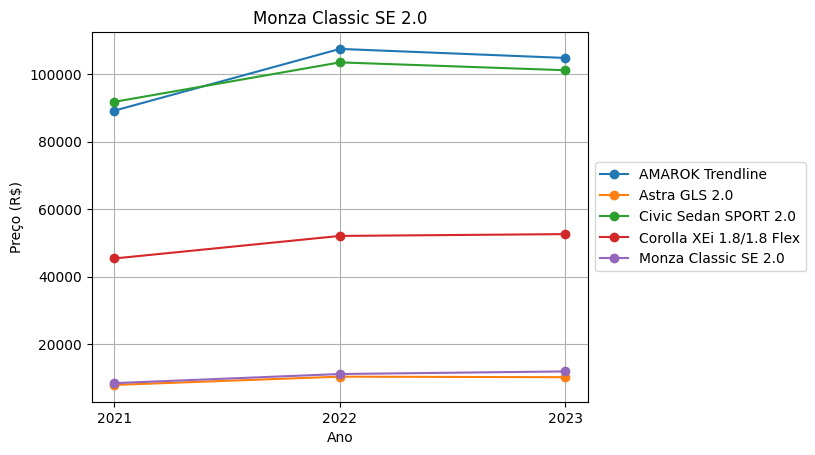

In [8]:
import matplotlib.pyplot as plt

selec = pd.read_excel('/content/drive/MyDrive/Colab/carrosSelec.xlsx')

for carro in selec['full_name'].unique():
  df_carro = selec.loc[selec['full_name'] == carro]

  plt.plot(df_carro['year_of_reference'], df_carro['year_mean'], marker='o', label=carro)

  plt.title(carro)
  plt.xlabel('Ano')
  plt.ylabel('Preço (R$)')

  plt.xticks([2021, 2022, 2023])
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.grid(True)

plt.show()


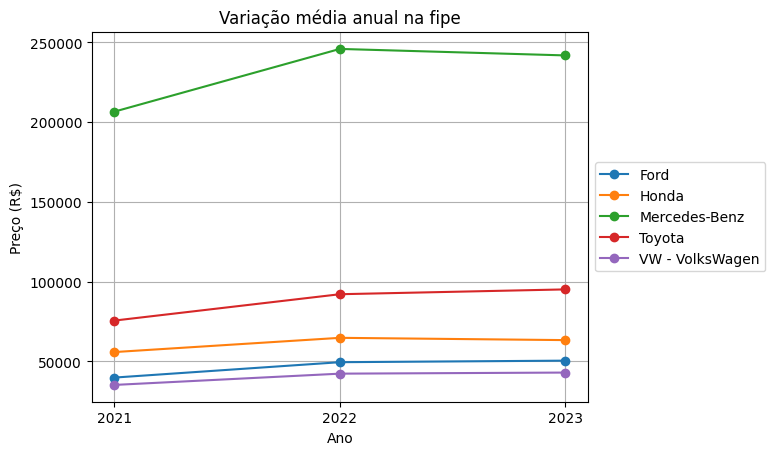

In [11]:
import matplotlib.pyplot as plt

selec = pd.read_excel('/content/drive/MyDrive/Colab/marcaSelec.xlsx')

for carro in selec['brand'].unique():
  df_carro = selec.loc[selec['brand'] == carro]

  plt.plot(df_carro['year_of_reference'], df_carro['year_mean'], marker='o', label=carro)

  plt.title('Variação média anual na fipe')
  plt.xlabel('Ano')
  plt.ylabel('Preço (R$)')

  plt.xticks([2021, 2022, 2023])
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.grid(True)

plt.show()

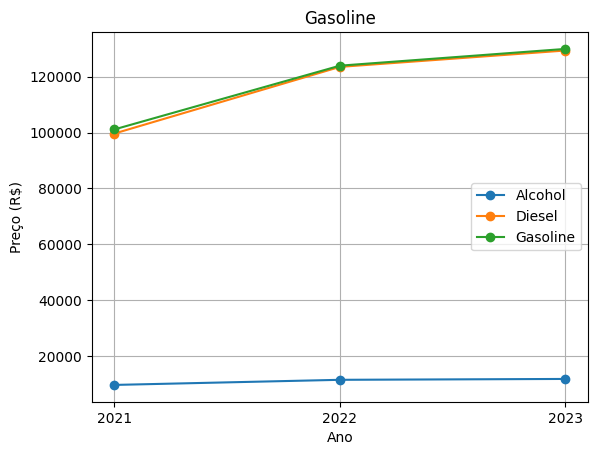

In [3]:
import matplotlib.pyplot as plt

selec = pd.read_excel('/content/drive/MyDrive/Colab/mediaFuel.xlsx')

for carro in selec['fuel'].unique():
  df_carro = selec.loc[selec['fuel'] == carro]

  plt.plot(df_carro['year_of_reference'], df_carro['year_mean'], marker='o', label=carro)

  plt.title(carro)
  plt.xlabel('Ano')
  plt.ylabel('Preço (R$)')

  plt.xticks([2021, 2022, 2023])
  plt.legend()
  plt.grid(True)

plt.show()

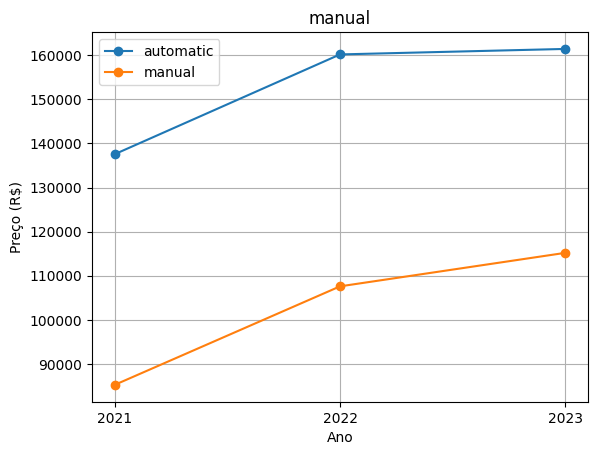

In [12]:
import matplotlib.pyplot as plt

selec = pd.read_excel('/content/drive/MyDrive/Colab/mediaGear.xlsx')

for carro in selec['gear'].unique():
  df_carro = selec.loc[selec['gear'] == carro]

  plt.plot(df_carro['year_of_reference'], df_carro['year_mean'], marker='o', label=carro)

  plt.title(carro)
  plt.xlabel('Ano')
  plt.ylabel('Preço (R$)')

  plt.xticks([2021, 2022, 2023])
  plt.legend()
  plt.grid(True)

plt.show()